# Growth and decay of Maryland counties since 2010

In [211]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pylab as plt


raw_data = pd.read_csv("MD_10_16.csv")


In [212]:
for col in raw_data:
    print(col)

SUMLEV
STATE
COUNTY
STNAME
CTYNAME
YEAR
AGEGRP
TOT_POP
TOT_MALE
TOT_FEMALE
WA_MALE
WA_FEMALE
BA_MALE
BA_FEMALE
IA_MALE
IA_FEMALE
AA_MALE
AA_FEMALE
NA_MALE
NA_FEMALE
TOM_MALE
TOM_FEMALE
WAC_MALE
WAC_FEMALE
BAC_MALE
BAC_FEMALE
IAC_MALE
IAC_FEMALE
AAC_MALE
AAC_FEMALE
NAC_MALE
NAC_FEMALE
NH_MALE
NH_FEMALE
NHWA_MALE
NHWA_FEMALE
NHBA_MALE
NHBA_FEMALE
NHIA_MALE
NHIA_FEMALE
NHAA_MALE
NHAA_FEMALE
NHNA_MALE
NHNA_FEMALE
NHTOM_MALE
NHTOM_FEMALE
NHWAC_MALE
NHWAC_FEMALE
NHBAC_MALE
NHBAC_FEMALE
NHIAC_MALE
NHIAC_FEMALE
NHAAC_MALE
NHAAC_FEMALE
NHNAC_MALE
NHNAC_FEMALE
H_MALE
H_FEMALE
HWA_MALE
HWA_FEMALE
HBA_MALE
HBA_FEMALE
HIA_MALE
HIA_FEMALE
HAA_MALE
HAA_FEMALE
HNA_MALE
HNA_FEMALE
HTOM_MALE
HTOM_FEMALE
HWAC_MALE
HWAC_FEMALE
HBAC_MALE
HBAC_FEMALE
HIAC_MALE
HIAC_FEMALE
HAAC_MALE
HAAC_FEMALE
HNAC_MALE
HNAC_FEMALE


### We want only the year over year data at a county level, not at the town levels. So let's get rid of all of the superfluous data. That means we want the following data
* CTYNAME: county name
* YEAR == 3-9: So that we can measure the difference (Note: This is not in terms of years, but of 1 -9, so we will need to clean that later. 1 and 2 are census totals taken in april of 2010, while 3-9 are estimates taken in July from 1010 on. We will only use the later for consistency)
* AGEGRP == 0: THis is the all encompassing age group.
* TOT_POP: Totall population
* TOT_MALE: Total male population
* TOT_FEMALE: Total female population

In [213]:
df = raw_data[['CTYNAME', 'YEAR', 'AGEGRP', 'TOT_POP', 'TOT_MALE', 'TOT_FEMALE']].copy()  #Make broad data slices

#Remove unnecessary age groups

df = df[df['AGEGRP'] == 0] 

#Remove superfluous census data, levave only July estimates
df = df[df['YEAR'] > 2]

#Convert YEAR to the actual year, not just an iterator
df['YEAR']+= 2007

df.drop('AGEGRP', axis = 1, inplace = True)

df.head(20)

,CTYNAME,YEAR,TOT_POP,TOT_MALE,TOT_FEMALE
38,Allegany County,2010,75021,38791,36230
57,Allegany County,2011,74586,38706,35880
76,Allegany County,2012,73975,38388,35587
95,Allegany County,2013,73618,38190,35428
114,Allegany County,2014,73045,37919,35126
133,Allegany County,2015,72531,37650,34881
152,Allegany County,2016,72130,37565,34565
209,Anne Arundel County,2010,539310,266685,272625
228,Anne Arundel County,2011,545017,269435,275582
247,Anne Arundel County,2012,550641,272423,278218


# Okay, now lets take a look at only the county populations year over year to see if they make sense

In [214]:
for col, row in df.iterrows():
    print(row['CTYNAME'], row['YEAR'], row['TOT_POP'])

Allegany County 2010 75021
Allegany County 2011 74586
Allegany County 2012 73975
Allegany County 2013 73618
Allegany County 2014 73045
Allegany County 2015 72531
Allegany County 2016 72130
Anne Arundel County 2010 539310
Anne Arundel County 2011 545017
Anne Arundel County 2012 550641
Anne Arundel County 2013 555897
Anne Arundel County 2014 559966
Anne Arundel County 2015 563837
Anne Arundel County 2016 568346
Baltimore County 2010 806241
Baltimore County 2011 813169
Baltimore County 2012 818282
Baltimore County 2013 823295
Baltimore County 2014 826518
Baltimore County 2015 829209
Baltimore County 2016 831026
Calvert County 2010 88945
Calvert County 2011 89291
Calvert County 2012 89685
Calvert County 2013 90477
Calvert County 2014 90601
Calvert County 2015 90620
Calvert County 2016 91251
Caroline County 2010 33062
Caroline County 2011 32912
Caroline County 2012 32640
Caroline County 2013 32658
Caroline County 2014 32524
Caroline County 2015 32591
Caroline County 2016 32850
Carroll Count

# All good there, so let's plot the data

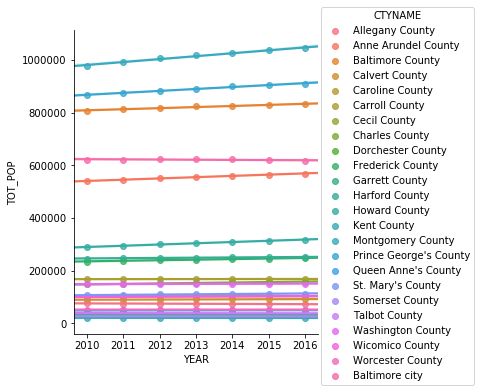

In [215]:
sb.lmplot(x = 'YEAR', y = 'TOT_POP', hue = 'CTYNAME', data = df)

# That doesn't seem so helpful, because all of the varied populations of the counties. We can't even read the bottom ones, because they are smooshed together. So let's try measuring the percent change year over year.

In [216]:
#Create a new column
temp_YEAR = None
dummy = df[['YEAR', 'TOT_POP']].copy()
dummy = dummy['TOT_POP'].shift(1)
#initiate temporary row with the last row in the column
temp_row= df.iloc[1].copy()
#On the off chance that we only have one column in the dataframe, or if the last county happens to match the first, reset it to None
temp_row['CTYNAME'] = None

df['TOT_CHNG'] = df['TOT_POP'].copy() - dummy

year_min = np.min(df['YEAR'])
year_max = np.max(df['YEAR'])


df['PER_CHNG'] = 100 * df['TOT_CHNG'].div(df['TOT_POP'].shift(1), axis = 0)

for col, row in df.iterrows():
    if df.loc[col]['YEAR'] == year_min:
        df.set_value(col, 'TOT_CHNG', 'NaN')
        df.set_value(col, 'PER_CHNG', 'NaN')


#Initialize the percent change and total change columns

In [217]:
df[df['CTYNAME'] == 'Charles County']

,CTYNAME,YEAR,TOT_POP,TOT_MALE,TOT_FEMALE,TOT_CHNG,PER_CHNG
1235,Charles County,2010,147148,71076,76072,NaN,NaN
1254,Charles County,2011,149282,72100,77182,2134.0,1.450241
1273,Charles County,2012,150770,72835,77935,1488.0,0.996771
1292,Charles County,2013,152821,73842,78979,2051.0,1.360350
1311,Charles County,2014,154567,74574,79993,1746.0,1.142513
1330,Charles County,2015,155923,75135,80788,1356.0,0.877289
1349,Charles County,2016,157705,76067,81638,1782.0,1.142872


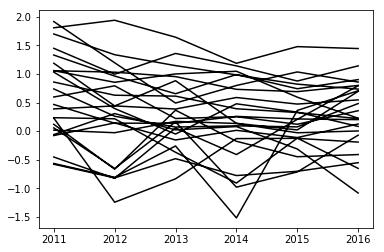

In [218]:
plt.plot(df['YEAR'], df['PER_CHNG'], color = '#000000')

(0.5, 6.5, -1.5, 2.0)

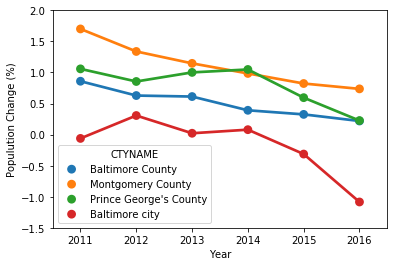

In [219]:
sb.pointplot(x = 'YEAR', 
             y = 'PER_CHNG', 
             hue = 'CTYNAME', 
             data = df[df['CTYNAME'].isin(['Baltimore County', 'Baltimore city', 'Prince George\'s County', 'Montgomery County'])])
plt.ylabel('Populution Change (%)')
plt.ylim(-1.5, 2)
plt.xlim(.5, 6.5)
plt.xlabel('Year')
plt.axis()

In [231]:
ordered_names = df[df['YEAR'] == year_max].copy()
ordered_names = ordered_names.sort_values('TOT_POP', ascending = False)
ordered_names = ordered_names['CTYNAME']
ordered_names[:5]

2546         Montgomery County
2717    Prince George's County
494           Baltimore County
4085            Baltimore city
323        Anne Arundel County
Name: CTYNAME, dtype: object

(0.5, 6.5, -1.5, 2.0)

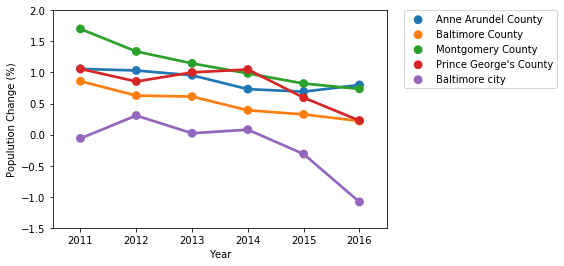

In [237]:
sb.pointplot(x = 'YEAR', 
             y = 'PER_CHNG', 
             hue = 'CTYNAME', 
             data = df[df['CTYNAME'].isin(ordered_names[:5])])
plt.ylabel('Populution Change (%)')
plt.ylim(-1.5, 2)
plt.xlim(.5, 6.5)
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.axis()